# Model performance measurement

Comments
- Original code provided by UoEO had almost no comments
- Maria Ingold added comments

Assignment asked for:
- Change different parameters
- Observe impact on AUC
- Observe impact on R Squared error.

Maria Ingold added test sections


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix # confusion matrix

### Example 1: Simple confusion matrix
- [0, 1, 0, 1] = First parameter = True labels
- [1, 1, 1, 0] = Second parameter = predicted labels
- (0, 2, 1, 1) = (true neg, false pos, false neg, true pos)
- ravel() flatttens into a 1-dimensional array, instead of 2x2.

In [24]:
# Simple confusion matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### Example 2: More complex confusion matrix

Code
- Creates a random classification dataset with default specification parameters. Default - 100 rows (samples), 20 columns (features), 2 informative features, 2 redundant features, 0 repeated and 2 classes (binary). This mean 16 features are noise.
- Create SVM classifier
- Predicts on the test set (25% of dataset)
- Generates and displays confusion matrix

Output
- Because training set is 25% of full dataset, and full dataset had 100 rows, test set has about 25 total samples.
- The confusion matrix is a total of 25 = 13 + 12:
- [12, 1] = [TN, FP]
- [2, 10] = [FN, TP]
- 12 true negative (TN)
- 1 false postiive (FP)
- 2 false negative (FN)
- 10 true positive (TP)




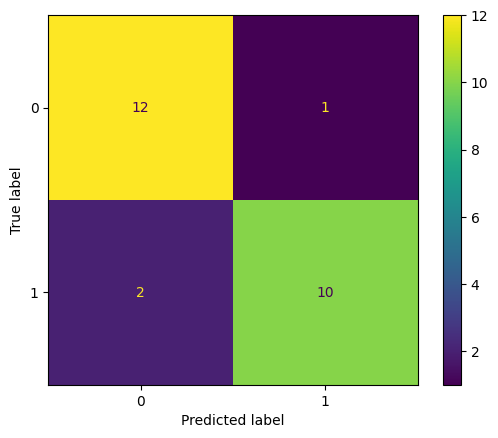

In [25]:
# Import libraries
import matplotlib.pyplot as plt                      # plotting
from sklearn.datasets import make_classification     # create sample dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # confusion matrix
from sklearn.model_selection import train_test_split # train test split
from sklearn.svm import SVC                          # Support Vector Machine classifier

# Generate random classification dataset with default specifications
X, y = make_classification(random_state=0)

# Split data into test and training (default is 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
# Create Support Vector Machine (SVM) classifier
clf = SVC(random_state=0) # Create SVM classifier
clf.fit(X_train, y_train) # fit trains SVM classifier on training data
SVC(random_state=0)

# Predict on the test set
predictions = clf.predict(X_test) # Predict on test data

# Confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [20]:
# MARIA: To get more understanding of the assignment's dataset

# Print the shape (number of rows, number of columns) of the features (X)
print("Shape of X:", X.shape)

# Print the shape of the target variable (y)
print("Shape of y:", y.shape)

# Print the first 5 rows of the features (X)
print("First 5 rows of X:\n", X[:5])

# Print the first 10 values of the target variable (y)
print("First 10 values of y:\n", y[:10])

Shape of X: (100, 20)
Shape of y: (100,)
First 5 rows of X:
 [[-0.03926799  0.13191176 -0.21120598 -1.2141474   1.05004467 -0.42132759
   0.76877064  0.87569568  2.45122972 -0.48024204 -2.13264106 -0.52325094
   0.70869527 -1.98056559 -1.36516288 -0.94893281  1.94709864  1.97698901
   1.02122474 -0.46931074]
 [ 0.77416061  0.10490717 -0.33281176 -1.27034986  0.37911283 -0.82282832
  -0.61262574  1.49613964  0.56845892 -0.46749317 -1.80170793 -0.8624933
  -0.63119194  0.13391292 -0.97240289 -0.77445897  1.34622107  1.2678044
   0.62251914 -1.49026539]
 [-0.0148577   0.67057045 -0.21416666  0.25020227  0.05548937 -1.56699471
   0.03976673  0.26568797  1.84959125  0.71998373  0.27713603 -1.10290621
   0.01927938 -0.7075057   0.72310049  0.82140594  0.02461213 -0.10486202
  -0.10169727 -0.45130304]
 [ 0.03890871 -1.55799853 -0.02454942  0.21654345  0.06527398 -0.67559383
   0.8449956   2.04207215 -1.10223019 -1.69237044  0.2295539   0.72934635
  -0.2987596  -0.50703477  0.038118    0.62656

## F1, Accuracy, Recall, AUC and Precision scores

- F1 = balanced measure of precision and recall
- Accuracy = needoverall correctness
- Precision = accuracy of positive predictions
- Recall = ability to find all positive instances

Best used when:
- F1 = a single metric, especially if imbalanced
- Accuracy = need overall correctness
- Precision = when cost of false positives is high (spam)
- Recall = when cost of false negatives is high (diagnosis)

Multilabel classsification
- E.g. image is beach, sunset and people.
- Accuracy may not be a useful metric
- F1 score is better for multilabel
- The result of [0.67, 1., 0.67] means that for
- y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
- y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
- column 1 is right 2/3 of time (wrong for last one)
- column 2 is right all of time
- column 3 is right 2/3 of time (wrong for last one)

### F1-Score

In [27]:
from sklearn.metrics import f1_score # F1 score, model performance measure

# EXAMPLE 1: Basic F1 calculatin with different averaging methods
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
# Create sample data with three classes 0, 1, and 2. These are the y.
y_true = [0, 1, 2, 0, 1, 2] # True, represents actual data labels
y_pred = [0, 2, 1, 0, 0, 1] # Predicted, represents classification predictions

# Calculate F1 score fore each class individually, then average
print(f"Macro f1 score: {f1_score(y_true, y_pred, average='macro')}")

# Calculate F1 score globally, considering TP, FN, and FP
print(f"Micro F1: {f1_score(y_true, y_pred, average='micro')}")

# Calculate F1 score for each class, average, and weigh score by number of true instances for class
print(f"Weighted Average F1: {f1_score(y_true, y_pred, average='weighted')}")

# Return F1 score for each individual class, without averaging
print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")


# EXAMPLE 2: Handling 0 division
# This example only has one class, which is 0.
y_true = [0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)


# EXAMPLE 3: multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
print(f"F1 No Average: {f1_score(y_true, y_pred, average=None)}")


Macro f1 score: 0.26666666666666666
Micro F1: 0.3333333333333333
Weighted Average F1: 0.26666666666666666
F1 No Average: [0.8 0.  0. ]
F1 No Average: [0.66666667 1.         0.66666667]


### Accuracy Score

In [30]:
# accuracy score
# accurate half of the time (middle two are inverted)
# (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

### Precision Score

In [31]:
# precision score
# precision .22 = just over 20%. Not just 2/6. Look at equation.
# True Positives / (True Positives + False Positives)
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

### Recall (Sensitivity) Score

In [32]:
# recall (sensitivity) score
# recall is a third.
# True Positives / (True Positives + False Negatives)
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

### Classification Report

In [34]:
# classification report
# precision: of the instances predicted as class, what % were actually that class?
# recall: The model identified what % of actual class instances (class 1 is bad)
# F1-score: What balance between precision and recall?
# Support: How many actual instances of that class?
#
# Overall: accuracy, micro avg, weighted avg
# Accuracy: model correctly classified what percent of data points?
# Macro avg: Averaged unweighted mean per label
# Weighted avg: Averaged support-weighted mean per label
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



### ROC AUC Score

- Compare predicted to actual to determine model's performance

#### Example 1 (binary): Breast cancer ROC AUC

- binary class: malignant or benign

In [10]:
from sklearn.datasets import load_breast_cancer # built-in breast cancer dataset
from sklearn.linear_model import LogisticRegression # good for binary classification
from sklearn.metrics import roc_auc_score # ROC AUC score

# load breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# create and train logistic regression model
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)

# calculate ROC AUC score
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.994767718408118

#### Example 2 (multiclass): Iris ROC AUC

- multiclass: setosa, versicolor, virginica
- multi_class = 'ovr' = one-vs-rest which treats this as a binary classification problem against the rest of the classes. Scores are averaged to get overall ROC AUC score.

In [35]:
from sklearn.datasets import load_iris # built-in Iris dataset

# load the iris dataset
X, y = load_iris(return_X_y=True)

# create and train logistic regression model
clf = LogisticRegression(solver="liblinear").fit(X, y)

# calculate ROC AUC score
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import iris data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

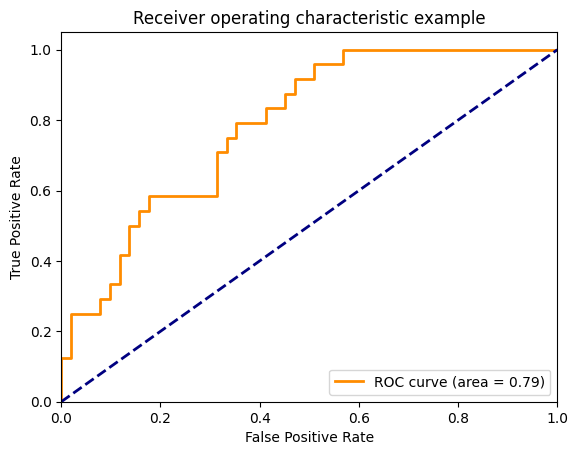

In [13]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


#### MARIA: CHANGE PARAMETERS AND OBSERVE IMPACT ON ROC AUC

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import iris data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#### Compare micro, macro, and weighted



In [59]:
# Example 1: Original: Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Example 2: Compute macro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Exampel 3: Compute macro and weighted AUCs
roc_auc["macro"] = np.mean(list(roc_auc.values())[:n_classes])
class_counts = np.sum(y_test, axis=0)
total_counts = np.sum(class_counts)
weights = class_counts / total_counts
roc_auc["weighted"] = np.sum([roc_auc[i] * weights[i] for i in range(n_classes)])

# Print AUCs
print("Micro-average AUC:", roc_auc["micro"])
print("Macro-average AUC:", roc_auc["macro"])
print("Weighted-average AUC:", roc_auc["weighted"])

Micro-average AUC: 0.7277333333333333
Macro-average AUC: 0.7677222740948232
Weighted-average AUC: 0.7488017429193901


# Commpare ROC AUC plots: micro (class 2), micro-averaged, macro, and weighted

1. Original: micro class 2
- micro = overall prediction performance (good for imbalanced datasets).
- false positive rate for class 2
- true positive rate for class 2

2. micro-average
- FPR and TPR micro-average

3. macro-average

4. weighted-average

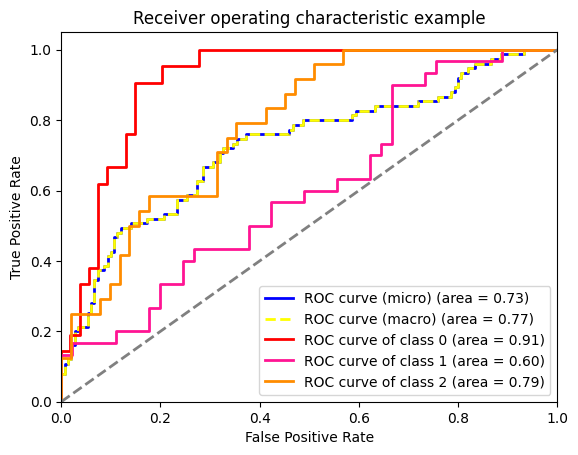

In [73]:
# Draw the ROC AUC for class 2
plt.figure()
lw = 2

# Example 2: Add ROC AUC micro-averaged FPR and TPR across all classes.
plt.plot(
    fpr["micro"], # false positive rate for micro-averaged
    tpr["micro"], # true positive rate for micro-averaged
    color="blue",
    lw=lw,
    label="ROC curve (micro) (area = %0.2f)" % roc_auc["micro"],
)

# Example 2: Add ROC AUC micro-averaged FPR and TPR across all classes.
plt.plot(
    fpr["macro"], # false positive rate for micro-averaged
    tpr["macro"], # true positive rate for micro-averaged
    linestyle="--",
    color="yellow",
    lw=lw,
    label="ROC curve (macro) (area = %0.2f)" % roc_auc["macro"],
)

# Example 3:
# Plot individual ROC curves for each class
colors = cycle(["red", "deeppink", "darkorange"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Log Loss

In [14]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

## Regression metrics

### RMSE

In [15]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

### MAE

In [16]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

### r squared

In [17]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.9486081370449679